##### Aux data

In [87]:
import pandas as pd
AuxTable = pd.read_csv('AuxillaryTable.csv', index_col='ID')           ### load file
AuxTable.head(685)                                                          ### preview the table

,star_distance,star_mass_kg,star_radius_m,star_temperature,planet_mass_kg,planet_orbital_period,planet_distance,planet_surface_gravity
ID,,,,,,,,
1,283.803,1.465591e+30,9.322380e+08,4803.0,2.509420e+27,3.550585,0.041144,32.771225
2,223.465,2.230747e+30,1.426067e+09,6115.0,6.409426e+26,19.148095,0.145546,8.370251
3,1516.960,3.313486e+30,1.690551e+09,7366.0,2.486766e+27,0.554233,0.015655,32.475379
4,542.026,2.087383e+30,1.071378e+09,5999.1,6.496475e+26,3.007820,0.041445,8.483931
5,597.937,1.804935e+30,8.835390e+08,5652.8,5.408769e+26,6.508121,0.066053,7.063465
...,...,...,...,...,...,...,...,...
681,377.872,1.695438e+30,1.383462e+09,5441.0,3.663562e+26,10.530579,0.089158,7.307499
682,366.987,2.666806e+30,1.252260e+09,6509.8,5.731968e+26,18.095475,0.148757,6.639195
683,347.850,1.869105e+30,6.609150e+08,5295.0,6.680521e+26,4.301219,0.050708,5.655702


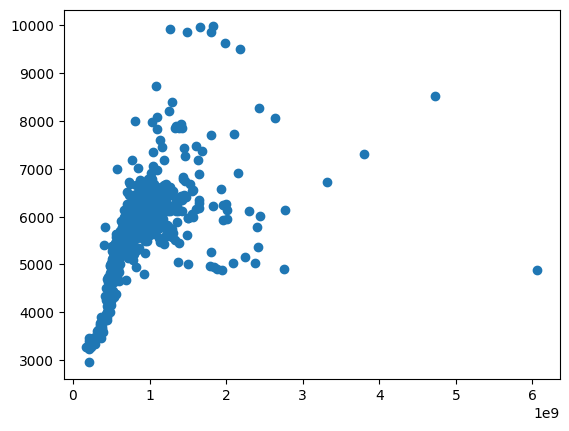

In [124]:
import matplotlib.pyplot as plt

plt.scatter(AuxTable['star_radius_m'],AuxTable["star_temperature"])
# plt.xlim(0,0.1)
# plt.ylim(0,120)
# plt.plot()

##### Import h5py

In [36]:
import h5py
SpectralData = h5py.File('SpectralData.hdf5')         ### load file
planetlist = [p for p in SpectralData.keys()]
## access wlgrid, spectrum, noise and wlwidth of a single planet instance
wlgrid = SpectralData[planetlist[0]]['instrument_wlgrid'][:]
spectrum = SpectralData[planetlist[0]]['instrument_spectrum'][:]
noise = SpectralData[planetlist[0]]['instrument_noise'][:]
wlwidth = SpectralData[planetlist[0]]['instrument_width'][:]
foutput = open("outputs.csv", "a+")
foutput.writelines(f"{planetlist , wlgrid, spectrum, noise, wlwidth}\n")

##### Saving the data to outputs.csv

In [43]:
import h5py
import csv

SpectralData = h5py.File('SpectralData.hdf5')         ### load file
planetlist = [p for p in SpectralData.keys()]

# Open the output CSV file
with open("outputs.csv", "w", newline='') as foutput:
    # Create a CSV writer object
    csv_writer = csv.writer(foutput)

    # Write the header row to the CSV file
    csv_writer.writerow(['Planet', 'Wavelength Grid', 'Spectrum', 'Noise', 'Wavelength Width'])

    # Iterate over all planets and write their data to the CSV file
    for planet in planetlist:
        wlgrid = SpectralData[planet]['instrument_wlgrid'][:]
        spectrum = SpectralData[planet]['instrument_spectrum'][:]
        noise = SpectralData[planet]['instrument_noise'][:]
        wlwidth = SpectralData[planet]['instrument_width'][:]

        # Combine the data into a single row and write it to the CSV file
        row = [planet, wlgrid, spectrum, noise, wlwidth]
        csv_writer.writerow(row)

# Close the HDF5 file
SpectralData.close()


##### Reading the outputs.csv file and column division

In [53]:
output = pd.read_csv('outputs.csv')
output.columns = ["Planet",	"Wavelength_Grid",	"Spectrum",	"Noise",	"Wavelength_Width"]
planet_id = output["Planet"]
Wavelength_Grid = output["Wavelength_Grid"]
Spectrum = output["Spectrum"]
Noise = output["Noise"]
Wavelength_Width = output["Wavelength_Width"]

##### Plotting

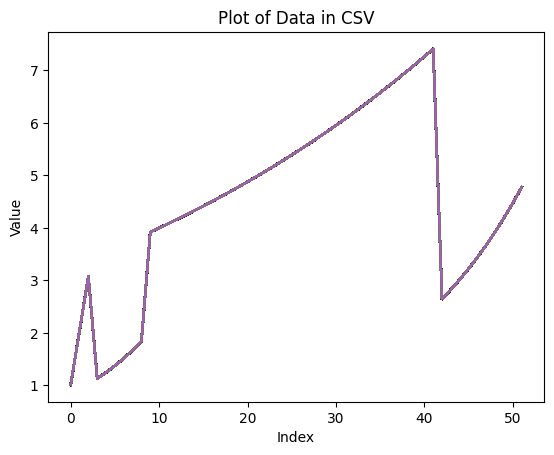

In [69]:
import matplotlib.pyplot as plt

# Function to convert the space-delimited string to a list of floats
def string_to_list(s):
    # Remove non-numeric characters such as '[' and ']'
    cleaned_string = s.replace('[', '').replace(']', '')
    return [float(x) for x in cleaned_string.split(' ') if x]

# Assuming Wavelength_Width is a pandas Series
array_data = Wavelength_Width.apply(string_to_list)

# Plot the data
for i, arr in enumerate(array_data):
    plt.plot(arr, label=f'Array {i+1}')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Data in CSV')
# plt.legend()

# Show the plot
plt.show()


##### Print hdf5 data

In [42]:
def print_h5py_group(group, indent=''):
    for key in group:
        item = group[key]
        if isinstance(item, h5py.Dataset):
            # print(f"{indent}{key}: Dataset, Shape: {item.shape}, Dtype: {item.dtype}")
            print(f"{indent}{key}:{item[...]}")
            # file.write(f"{indent}{key}: Dataset, Data: {item[...]}, Shape: {item.shape}, Dtype: {item.dtype}\n")
            foutput = open("hdf5.csv", "a+")
            foutput.writelines(f"{indent}{key}:{item[...]}\n")
        elif isinstance(item, h5py.Group):
            print(f"{indent}{key}: Group")
            print_h5py_group(item)

with h5py.File('SpectralData.hdf5', 'r') as file:
    print_h5py_group(file)

Planet_public1: Group
instrument_noise:[1.87392995e-05 1.23922666e-05 1.00216762e-05 1.63365517e-05
 1.47542199e-05 1.37853925e-05 1.33234474e-05 1.41504406e-05
 2.04851112e-05 4.48422841e-05 4.58174181e-05 3.94221846e-05
 3.96745357e-05 4.16020068e-05 4.11890644e-05 4.15573433e-05
 4.36717497e-05 4.54087723e-05 4.52287005e-05 4.63193522e-05
 4.86849906e-05 5.01363592e-05 4.75176966e-05 4.74488932e-05
 4.87297682e-05 5.21679058e-05 5.27254400e-05 5.32241218e-05
 5.27591405e-05 5.48447249e-05 5.65441054e-05 5.97909685e-05
 5.96936716e-05 5.93116686e-05 6.10539805e-05 6.29058593e-05
 6.61539234e-05 6.94000659e-05 6.90206449e-05 7.12461053e-05
 7.28654398e-05 7.98432245e-05 3.57126872e-05 3.94813311e-05
 4.55188815e-05 4.74078075e-05 5.53219077e-05 6.38939690e-05
 6.95026928e-05 8.66975799e-05 1.15440294e-04 1.41979039e-04]
instrument_spectrum:[0.01287469 0.01283023 0.01290463 0.01303119 0.01295515 0.01321524
 0.01309405 0.01302101 0.0131983  0.01319474 0.01319051 0.01314904
 0.01308685 0

##### Conversion before Submission

In [5]:
import pandas as pd
import h5py
from tqdm import tqdm
import numpy as np 

def to_light_track_format(q1_array, q2_array, q3_array, columns = None, name="LT_submission.csv"):
    """Helper function to prepare submission file for the light track, 
    we assume the test data is arranged in assending order of the planet ID.

    Args:
        q1_array: N x 6 array containing the estimates for 16% percentile
        q2_array: N x 6 array containing the estimates for 50% percentile
        q3_array: N x 6 array containing the estimates for 84% percentile
        columns: columns for the df. default to none

    Returns:
        Pandas DataFrame object
    """
    # create empty array
    LT_submission_df = pd.DataFrame(columns= columns)
    # sanity check - length should be equal
    assert len(q1_array) == len(q2_array) == len(q3_array)
    targets_label = ['T', 'log_H2O', 'log_CO2','log_CH4','log_CO','log_NH3']
    # create columns for df
    default_quartiles = ['q1','q2','q3']
    default_columns = []
    for c in targets_label:
        for q in default_quartiles:
            default_columns.append(c+q)
    
    if columns is None:
        columns = default_columns
    for i in tqdm(range(len(q1_array))):
        quartiles_dict = {}
        quartiles_dict['planet_ID'] = i
        for t_idx, t in enumerate(targets_label):
            quartiles_dict[f'{t}_q1']= q1_array[i, t_idx]
            quartiles_dict[f'{t}_q2']= q2_array[i, t_idx]
            quartiles_dict[f'{t}_q3']= q3_array[i, t_idx]
        LT_submission_df = pd.concat([LT_submission_df, pd.DataFrame.from_records([quartiles_dict])],axis=0,ignore_index = True)
    LT_submission_df.to_csv(name,index= False)
    return LT_submission_df


def to_regular_track_format(tracedata_arr, weights_arr, name="RT_submission.hdf5"):
    """convert input into regular track format.
    we assume the test data is arranged in assending order of the planet ID.

    Args:
        tracedata_arr (array): Tracedata array, usually in the form of N x M x 6, where M is the number of tracedata, here we assume tracedata is of equal size. It does not have to be but you will need to craete an alternative function if the size is different. 
        weights_arr (array): Weights array, usually in the form of N x M, here we assumed the number of weights is of equal size, it should have the same size as the tracedata

    Returns:
        None
    """
    submit_file = name
    RT_submission = h5py.File(submit_file,'w')
    for n in range(len(tracedata_arr)):
        ## sanity check - samples count should be the same for both
        assert len(tracedata_arr[n]) == len(weights_arr[n])
        ## sanity check - weights must be able to sum to one.
        assert np.isclose(np.sum(weights_arr[n]),1)

        grp = RT_submission.create_group(f"Planet_{n}")
        pl_id = grp.attrs['ID'] = n 
        tracedata = grp.create_dataset('tracedata',data=tracedata_arr[n])         
        weight_adjusted = weights_arr[n]

        weights = grp.create_dataset('weights',data=weight_adjusted)
    RT_submission.close()